In [0]:
import nltk
import numpy as np
import scipy
import sklearn
import networkx
import bs4 as bs

In [0]:
!pip install parsel

In [0]:
import urllib.request
from html.parser import HTMLParser
from urllib.parse import urlparse
from parsel import Selector
import networkx as nx

# TASK 1: WEB CRAWLER

a) 5 seed URLs

b) Fetching webpages

In [0]:
url_set = ['https://www.fatestaynightusa.com/','https://en.wikipedia.org/wiki/India','https://in.reuters.com/news/world','https://www.dronecode.org','https://wiki.ros.org']


In [0]:
from bs4.element import Comment
import re,string

In [0]:
def clean(s_l):
    cl_s = ""
    for i in s_l:
        if(i == ''):
            continue
        s = re.sub('[\W_]+', ' ', i)
        cl_s += s + " "
    return cl_s

c) Parsing content

Helper Functions

In [0]:
def getText(html):
    try:
      soup = bs.BeautifulSoup(html,'html.parser')
      st = []
      for paragraph in soup.find_all('p'):
          st.append(str(paragraph.text).strip())
      return clean(st)
    except:
      print("ERROR IN TEXT FOR THE WEBSITE")

In [0]:
def getDataFromURL(url):
    try:
        with urllib.request.urlopen(url) as response:
            html = response.read()
            return html
    except urllib.error.HTTPError as err:
        print(err.code)
    except:
        print("ERROR IN CONTENT OF THE WEBSITE WHICH IS NOT ACCESS ERROR")

    

In [0]:
def getSelector(html):
    try:
        selector = Selector(text=html.decode("utf-8").strip())
        return selector
    except:
        print("ERROR IN SELECTOR FOR THE WEBSITE")

In [0]:
def getBody(selector):
    pol = selector.css('body').get()
    return pol


In [0]:
def getUrls(selector):
    urls = selector.xpath('//a/@href').getall() 
    return urls

In [0]:
def processQueue(url):
    parsedURL = urlparse(url)
    
    data = getDataFromURL(url)
    if(data is None):
        return 89,56
    text = getText(data)
    if(text is None):
      return 89,56
    selector = getSelector(data)
    if(selector is None):
        return 89,56
    body = getBody(selector)
    urls = getUrls(selector)
    
    for idx,i in enumerate(urls):
        if i.startswith("/"):
            urls[idx] = parsedURL.scheme + '://' + parsedURL.netloc + i
            #print(urls[idx])

    return urls,text


Actual Parsing and Making of the Graph

In [0]:
comp_url_act = []
for i in url_set:
    urls_act,txt_act = processQueue(i)
    comp_url_act.append(urls_act)

In [0]:
graph = nx.DiGraph()
c=0
for j,urls_act in enumerate(comp_url_act):
    for i in urls_act:
        if not i.startswith("#"):
            c+=1
            graph.add_edge(url_set[j],i)


d) Setting up URL frontier

In [0]:
url_frontier = []

In [0]:
for urls_act in comp_url_act:
    ext_url = [i for i in urls_act if not i.startswith("#")]
    url_frontier = url_frontier + ext_url

In [0]:
import random
import heapq
from datetime import datetime, timedelta
from random import randrange

In [0]:
random.shuffle(url_frontier)

In [0]:
back_q = {}
now = datetime.now()
start = now.strftime("%H:%M:%S")
start

'07:24:57'

d) back queue implementation for URL frontier

e) discarding if already fetched

In [0]:
for url in url_frontier:
    parsed_uri = urlparse(url)
    result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri) #Find the host domain
    
    if(result not in back_q):
        back_q[result] = []
        back_q[result].append(url)
        
    else:
        back_q[result].append(url)
            
    

In [0]:
back_q_keys = list(back_q.keys())

In [0]:
random.shuffle(back_q_keys)

Function for adding to back queue

In [0]:
def add_to_back(urls,back_q,m_heap):
    ext_url = [i for i in urls if not i.startswith("#")]
    for url in ext_url:
        parsed_uri = urlparse(url)
        result = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri) #Find the host domain
        if('https' not in result and 'http' not in result):
            continue  
        if(result not in back_q):
            back_q[result] = []
            back_q[result].append(url)
            now = datetime.now()
            start = now + timedelta(minutes=randrange(60))
            m_heap.append((start,result))
        else:
            back_q[result].append(url)

    back_q_keys = list(back_q.keys())
    random.shuffle(back_q_keys)
    heapq.heapify(m_heap)
    return back_q, m_heap


In [0]:
doc_list = []
m_heap = []

In [0]:
for key in back_q_keys:
    now = datetime.now()
    
    start = now + timedelta(minutes=randrange(60))
    
    m_heap.append((start,key))

In [0]:
heapq.heapify(m_heap)

f) collecting till 100 documents collected

In [0]:
while(len(doc_list) < 100):
    root = m_heap[0]
    
    print('root ', root)
    if(len(back_q[root[1]]) == 0):
        heapq.heappop(m_heap)
        continue
    needed_url = back_q[root[1]][0]
    urls_act,txt_act = processQueue(needed_url)
    
    #if(len(back_q[root[1]]) == 0):
    
    back_q[root[1]].remove(needed_url)
    m_heap[0] = (m_heap[0][0]+timedelta(2),m_heap[0][1])
    
    if(type(urls_act) == int):
        heapq.heapify(m_heap)
        continue
    
    if(not any(i.isalnum() for i in txt_act)):
        print("Cant take no alphanumeric character strings")
        heapq.heapify(m_heap)
        continue

    if(txt_act in doc_list):
        print("SEEN THIS")
        heapq.heapify(m_heap)
        continue
    
    #print(needed_url)
    
    doc_list.append(txt_act)
    back_q, m_heap = add_to_back(urls_act,back_q,m_heap)
    
    for i in urls_act:
        if not i.startswith("#"):
                
            graph.add_edge(needed_url,i)
    
    heapq.heapify(m_heap)
    
    print(len(doc_list))




root  (datetime.datetime(2019, 11, 18, 7, 25, 14, 917917), 'http://thebulletin.org/')
403
root  (datetime.datetime(2019, 11, 18, 7, 25, 14, 918011), 'https://www.sportskeeda.com/')
1
root  (datetime.datetime(2019, 11, 18, 7, 25, 14, 918103), 'https://curlie.org/')
2
root  (datetime.datetime(2019, 11, 18, 7, 25, 14, 919483), 'https://arz.wikipedia.org/')
3
root  (datetime.datetime(2019, 11, 18, 7, 25, 14, 919544), 'https://su.wikipedia.org/')
4
root  (datetime.datetime(2019, 11, 18, 7, 26, 14, 917863), 'http://www.defencereviewasia.com/')
404
root  (datetime.datetime(2019, 11, 18, 7, 26, 14, 918070), 'https://da.wikipedia.org/')
5
root  (datetime.datetime(2019, 11, 18, 7, 26, 14, 918125), 'http://www.thecommonwealth.org/')
403
root  (datetime.datetime(2019, 11, 18, 7, 26, 14, 918377), 'http://timesofindia.indiatimes.com/')
ERROR IN CONTENT OF THE WEBSITE WHICH IS NOT ACCESS ERROR
root  (datetime.datetime(2019, 11, 18, 7, 26, 14, 919101), 'https://pnb.wikipedia.org/')
6
root  (datetime.d

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


ERROR IN SELECTOR FOR THE WEBSITE
root  (datetime.datetime(2019, 11, 18, 7, 29, 25, 4472), 'http://beta.thehindu.com/')
68
root  (datetime.datetime(2019, 11, 18, 7, 29, 25, 5602), 'http://www.gardenvisit.com/')
404
root  (datetime.datetime(2019, 11, 18, 7, 29, 29, 277953), 'http://data.europa.eu/')
69
root  (datetime.datetime(2019, 11, 18, 7, 29, 42, 483698), 'https://support.apple.com/')
70
root  (datetime.datetime(2019, 11, 18, 7, 28, 38, 120188), 'https://discussions.apple.com/')
71
root  (datetime.datetime(2019, 11, 18, 7, 29, 42, 483710), 'http://www.macromedia.com/')
72
root  (datetime.datetime(2019, 11, 18, 7, 27, 39, 951874), 'http://adobe.com/')


Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


ERROR IN SELECTOR FOR THE WEBSITE
root  (datetime.datetime(2019, 11, 18, 7, 30, 1, 513014), 'https://instagram.com/')
Cant take no alphanumeric character strings
root  (datetime.datetime(2019, 11, 18, 7, 30, 1, 513366), 'https://get.adobe.com/')
73
root  (datetime.datetime(2019, 11, 18, 7, 30, 3, 271306), 'https://ky.wikiquote.org/')
74
root  (datetime.datetime(2019, 11, 18, 7, 30, 5, 126999), 'https://te.wikibooks.org/')
75
root  (datetime.datetime(2019, 11, 18, 7, 30, 5, 555333), 'https://xh.wikibooks.org/')
76
root  (datetime.datetime(2019, 11, 18, 7, 30, 10, 803705), 'https://fur.wikibooks.org/')
77
root  (datetime.datetime(2019, 11, 18, 7, 30, 11, 216309), 'https://om.wikiquote.org/')
SEEN THIS
root  (datetime.datetime(2019, 11, 18, 7, 30, 14, 918088), 'https://hls-dhs-dss.ch/')
403
root  (datetime.datetime(2019, 11, 18, 7, 30, 14, 918883), 'http://www.holybro.com/')
78
root  (datetime.datetime(2019, 11, 18, 7, 29, 48, 933565), 'https://shop.holybro.com/')
79
root  (datetime.datet

Saving network in csv file

In [0]:
import pandas as pd
df = pd.DataFrame(nx.edges(graph))
df.to_csv('network.csv')

In [0]:
from google.colab import files
files.download('network.csv')

#Task 2: Nearly Duplicate Detection

In [0]:
#Part 1

import pandas as pd

In [0]:
df_temp = pd.DataFrame({'docs':doc_list})

In [0]:
df_temp.shape

(100, 1)

In [0]:
df_temp.head()

,docs
0,Attendance is a good measure of popularity of ...
1,Visit Curlie on Facebook Visit Curlie on Twitter
2,مجموع 3 287 590 كلم² مجموع 1 120 000 000 ال...
3,India भ रत resmina Républik India mangrupa sal...
4,Indien officielt Republikken Indien भ रत गणर ज...


In [0]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
docs    100 non-null object
dtypes: object(1)
memory usage: 928.0+ bytes


In [0]:
def clean_data_dl(hd_df,col_name):
  #removing multiple spaces
  hd_df[col_name]=hd_df[col_name].str.replace(' +',' ')
  return hd_df

def_temp = clean_data_dl(df_temp,'docs')
df_temp = df_temp[df_temp['docs'] != '']
df_temp = df_temp[df_temp['docs'] != ' ']


In [0]:
doc_list_new = df_temp.iloc[:,:].values

The TfidfVectorizer from sklearn is used to get the tf-idf vector of the documents

In [0]:
def jaccard_similarity(document1, document2):
    intersection = set(document1).intersection(set(document2))
    union = set(document1).union(set(document2))
    return len(intersection)/len(union)

a) Computing Jaccard similarity

In [0]:
jaccard_similarity_list = []

for i in range(len(doc_list_new)):
  document1 = doc_list_new[i][0]
  vector_for_each_doc = []
  for j in range(len(doc_list_new)):
    document2 = doc_list_new[j][0]
    vector_for_each_doc.append(jaccard_similarity(document1,document2))
  jaccard_similarity_list.append(vector_for_each_doc)


In [0]:
for i in range(len(jaccard_similarity_list)):
  print(jaccard_similarity_list[i])
  print()


[1.0, 0.37777777777777777, 0.18947368421052632, 0.6056338028169014, 0.5308641975308642, 0.07526881720430108, 0.25, 0.5178571428571429, 0.3829787234042553, 0.7678571428571429, 0.21951219512195122, 0.45652173913043476, 0.65625, 0.6, 0.4174757281553398, 0.5797101449275363, 0.7288135593220338, 0.49295774647887325, 0.7241379310344828, 0.5833333333333334, 0.7090909090909091, 0.6607142857142857, 0.23529411764705882, 0.00641025641025641, 0.47619047619047616, 0.6444444444444445, 0.014084507042253521, 0.6530612244897959, 0.6530612244897959, 0.6458333333333334, 0.6521739130434783, 0.5584415584415584, 0.7413793103448276, 0.7037037037037037, 0.7241379310344828, 0.21739130434782608, 0.6833333333333333, 0.7222222222222222, 0.40476190476190477, 0.013157894736842105, 0.10723860589812333, 0.09191176470588236, 0.45098039215686275, 0.013157894736842105, 0.56, 0.2875, 0.009345794392523364, 0.4588235294117647, 0.5319148936170213, 0.6415094339622641, 0.19444444444444445, 0.5102040816326531, 0.415094339622641

In [0]:
pip install seaborn

In [0]:
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

i. Diagonal heatmap of Jaccard similarity

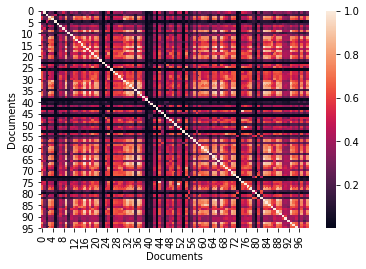

In [0]:
heatmap = sb.heatmap(jaccard_similarity_list)
heatmap.set_ylabel('Documents')
heatmap.set_xlabel('Documents')
plt.show()

In [0]:
doc_final = []
for elem in doc_list_new:
  doc_final.append(elem[0])

doc_np = np.asarray(doc_final)

b) Storing the number of times specific term has appeared

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(doc_final)


i. Rows as terms, columns as document vectors

In [0]:
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
df = df.transpose()
print(df)

           0   1   2   3   4   5   6   7   ...  92  93  94  95  96  97  98  99
00          0   0   0   0   0   0   0   0  ...   0   1   0   0   0   0   0   0
000         0   0   3   4  22   1   0   0  ...   0   0   0   0   2   0   1   0
000க        0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
000公頃       0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
004         0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
...        ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..  ..
𐍃𐌹𐌺𐌷𐌹𐍃𐌼𐌿𐍃   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
𐍃𐌹𐌽𐌰        0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
𐍃𐌹𐌽𐌳        0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
𐍃𐌿𐌽𐌸𐍂𐌰      0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0
𐍃𐍂𐌹         0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0

[25620 rows x 100 columns]


ii. 20 permutations and their signatures

In [0]:
import random
permutation = []

for i in range(20):
  permutation.append(random.sample(range(0, len(df)), len(df)))
  



In [0]:
signature_doc = []
for i in range(20):
    perm_i = permutation[i]
    doc_l_i = []
    for d in range(df.shape[1]):
        for j in perm_i:
            if(df.iloc[[j],[d]].values > 0):
                doc_l_i.append(j)
                break
    signature_doc.append(doc_l_i)

    


In [0]:
s_docs = np.array(signature_doc)

In [0]:
len(s_docs)

20

iii. Jaccard similarity of signatures

In [0]:
jaccard_signature = []

for i in range(len(s_docs[0])):
  document1 = s_docs[:,i]
  vector_for_each_doc = []
  for j in range(len(s_docs[0])):
    document2 = s_docs[:,j]
    vector_for_each_doc.append(jaccard_similarity(document1,document2))
  jaccard_signature.append(vector_for_each_doc)

iv. Diagonal heatmap of signatures

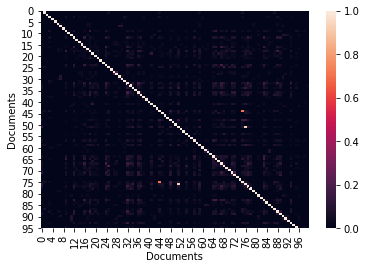

In [0]:
heatmap = sb.heatmap(jaccard_signature)
heatmap.set_ylabel('Documents')
heatmap.set_xlabel('Documents')
plt.show()

#TASK 3: Link Analysis

a) PageRank = number of incoming links

In [0]:
incoming_link = {}

for i,j in graph.edges:
    if j not in incoming_link:
        incoming_link[j] = 1
    else:
        incoming_link[j] +=1

In [0]:
ordered_inc_link = [(j,i) for i,j in incoming_link.items()]
#sorted(ordered_inc_link,reverse=True)
x = [j for i,j in ordered_inc_link]
y = [i for i,j in ordered_inc_link]

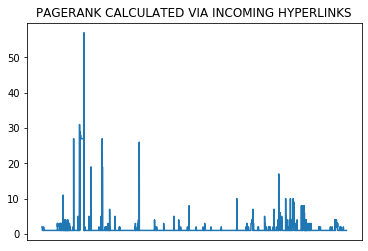

In [0]:
import matplotlib.pyplot as plt
plt.title("PAGERANK CALCULATED VIA INCOMING HYPERLINKS")
plt.plot(x,y)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

##ITERATIVE METHOD

In [0]:
outgoing_links = {}
backlinks = {}

b) Iterative method with no teleporting

In [0]:
for i,j in graph.edges:
    if i not in outgoing_links:
        outgoing_links[i] = 1
    else:
        outgoing_links[i] +=1
    if j not in backlinks:
        backlinks[j] = []
        backlinks[j].append(i)
    else:
        backlinks[j].append(i)

In [0]:
iterative_page_rank = {}
total_link_list = []

In [0]:
for i in outgoing_links:
    total_link_list.append(i)
for i in backlinks:
    if i not in total_link_list:
        total_link_list.append(i)
for i in total_link_list:
    iterative_page_rank[i] = 0

In [0]:
d = 0.85

In [0]:
for i in range(3):
    for j in total_link_list:
        if j not in backlinks:
            iterative_page_rank[j] = 1-d
            continue
        s = 0
        for inc in backlinks[j]:
            if inc not in outgoing_links:
                continue
            else:
                s += (iterative_page_rank[inc]*1.0)/outgoing_links[inc]
        iterative_page_rank[j] = 1-d + d*s




In [0]:
k_list = [i for i,j in iterative_page_rank.items()]
v_list = [j for i,j in iterative_page_rank.items()]


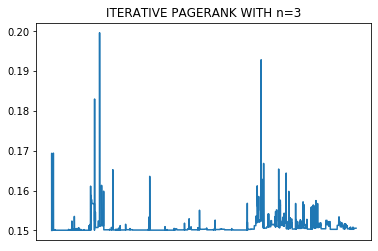

In [0]:
plt.title("ITERATIVE PAGERANK WITH n=3")
plt.plot(k_list, v_list)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [0]:
removed_total_link_list = []
for link in total_link_list:
    if link in outgoing_links:
        removed_total_link_list.append(link)

In [0]:
removed_iterative_page_rank = {}
for i in removed_total_link_list:
    removed_iterative_page_rank[i] = 0

c) Re-computing PageRank after discarding nodes with no outgoing edges

In [0]:
removed_backlinks = {}
removed_outgoing_links = {}

for i,j in graph.edges:
    if i not in removed_total_link_list:
         print("CANT BE ",i)
    if j not in removed_total_link_list:
            continue

    if i not in removed_outgoing_links:
        removed_outgoing_links[i] = 1
    else:
        removed_outgoing_links[i] += 1
    
    if j not in removed_backlinks:
        removed_backlinks[j] = []
        removed_backlinks[j].append(i)
    else:
        removed_backlinks[j].append(i)
    
    

In [0]:
for i in range(3):
    for j in removed_total_link_list:
        if j not in removed_backlinks:
            removed_iterative_page_rank[j] = 1-d
            continue
        s = 0
        for inc in removed_backlinks[j]:
            if inc not in removed_outgoing_links:
                continue
            else:
                s += (removed_iterative_page_rank[inc]*1.0)/removed_outgoing_links[inc]
        removed_iterative_page_rank[j] = 1-d + d*s

In [0]:
k_list2 = [i for i,j in removed_iterative_page_rank.items()]
v_list2 = [j for i,j in removed_iterative_page_rank.items()]

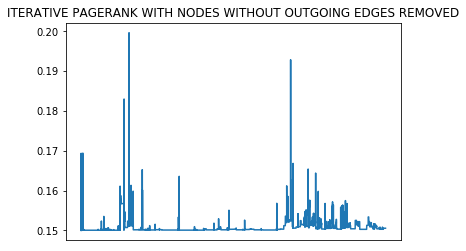

In [0]:
plt.title("ITERATIVE PAGERANK WITH NODES WITHOUT OUTGOING EDGES REMOVED")
plt.plot(k_list, v_list)
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

In [0]:
common_k = []
common_v = []

for link in removed_total_link_list:
    
    common_k.append(link)
    common_v.append(iterative_page_rank[link])

3d) Line graph comparing results of 3(b) and 3(c) as 

common = values of page rank for the links which are common between 3b and 3c so that we can compare them in a line graph

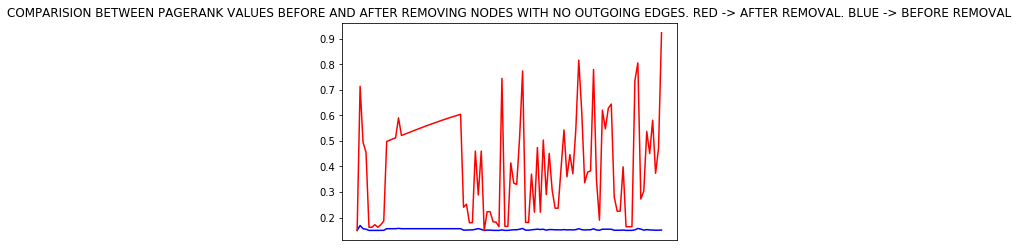

In [0]:
plt.title("COMPARISION BETWEEN PAGERANK VALUES BEFORE AND AFTER REMOVING NODES WITH NO OUTGOING EDGES. RED -> AFTER REMOVAL. BLUE -> BEFORE REMOVAL")
plt.plot(common_k, common_v,'b')
plt.plot(k_list2, v_list2, 'r')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()

There is a significant increase in PageRank after removing sink nodes (red) as compared to the value with sink nodes (blue). This is because these nodes did not contribute to the PageRank of other nodes, while reducing the contribution of nodes that had outgoing links to the sink nodes, which in turn lowered the PageRank of all other nodes. Upon removing the sink nodes, the contribution of the nodes that previously had outgoing edges to sink nodes increased due to the decrease in out degree, which increases the PageRank of the nodes still connected to them. 

##MATRIX MULTIPLICATION

In [0]:
transition_matrix = np.zeros((len(total_link_list),len(total_link_list)))

e) Implementation of the matrix multiplication method

In [0]:
#Make the stochastic adjacency matrix

for i in range(len(total_link_list)):
    for j in range(len(total_link_list)):
        if total_link_list[i] not in backlinks:
            continue
        if total_link_list[j] in backlinks[total_link_list[i]]:
            transition_matrix[i][j] = 1.0/outgoing_links[total_link_list[j]] 

In [0]:
pagerank_vector = np.ones(len(total_link_list))

In [0]:
for i in range(3):
    pagerank_vector = transition_matrix.dot(pagerank_vector)

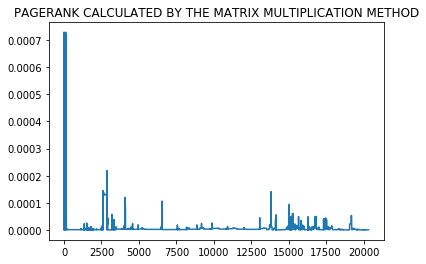

In [0]:
plt.title("PAGERANK CALCULATED BY THE MATRIX MULTIPLICATION METHOD")
plt.plot(pagerank_vector)
plt.show()

In [0]:
transition_matrix_removed = np.zeros((len(removed_total_link_list),len(removed_total_link_list)))

f) Matrix multiplication after removing sink nodes

In [0]:
for i in range(len(removed_total_link_list)):
    for j in range(len(removed_total_link_list)):
        if removed_total_link_list[i] not in removed_backlinks:
            continue
        if removed_total_link_list[j] in removed_backlinks[removed_total_link_list[i]]:
            transition_matrix_removed[i][j] = 1.0/removed_outgoing_links[removed_total_link_list[j]] 

In [0]:
pagerank_vector_removed = np.ones(len(removed_total_link_list))

In [0]:
for i in range(3):
    pagerank_vector_removed = transition_matrix_removed.dot(pagerank_vector_removed)

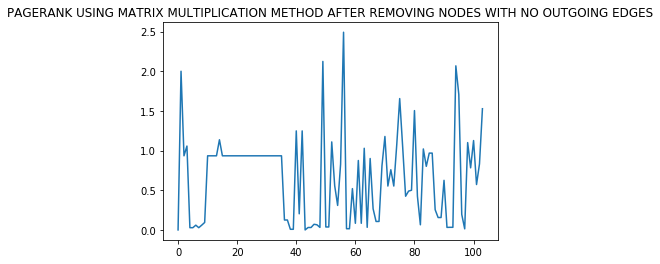

In [0]:
plt.title("PAGERANK USING MATRIX MULTIPLICATION METHOD AFTER REMOVING NODES WITH NO OUTGOING EDGES")
plt.plot(pagerank_vector_removed)
plt.show()

In [0]:
common = []

for i in removed_total_link_list:
    
    idx2 = total_link_list.index(i)
    common.append(pagerank_vector[idx2])
    

g) Line chart of common

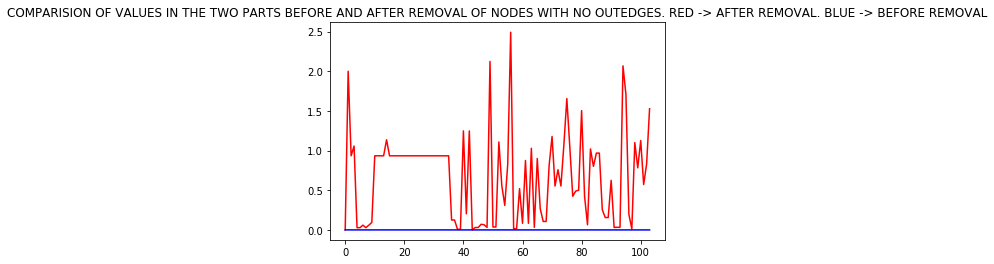

In [0]:
plt.title("COMPARISION OF VALUES IN THE TWO PARTS BEFORE AND AFTER REMOVAL OF NODES WITH NO OUTEDGES. RED -> AFTER REMOVAL. BLUE -> BEFORE REMOVAL")
plt.plot(pagerank_vector_removed,'r')
plt.plot(common,'b')
plt.show()

There is a sharp increase in PageRank after the removal of sink nodes (red) compared to the value before removal (blue). This is because the contribution of the remaining vertices increased drastically after removal of sink vertices in part 3f, which reduces the out degree of remaining vertices and increases the PageRank across the network, similar to 3d.